In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [2]:

skin_df = pd.read_csv('C:/Users/kunal_student/Desktop/Code/Github Projects/Skin Cancer Classification/data/HAM10000/HAM10000_metadata.csv')

#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('C:/Users/kunal_student/Desktop/Code/Github Projects/Skin Cancer Classification/data/HAM10000/', '*', '*.jpg'))}


In [3]:
#Define the path and add as a new column
skin_df['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

print(skin_df['dx'].value_counts())

n_samples = 5  # number of samples for plotting

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


# PLOTTING

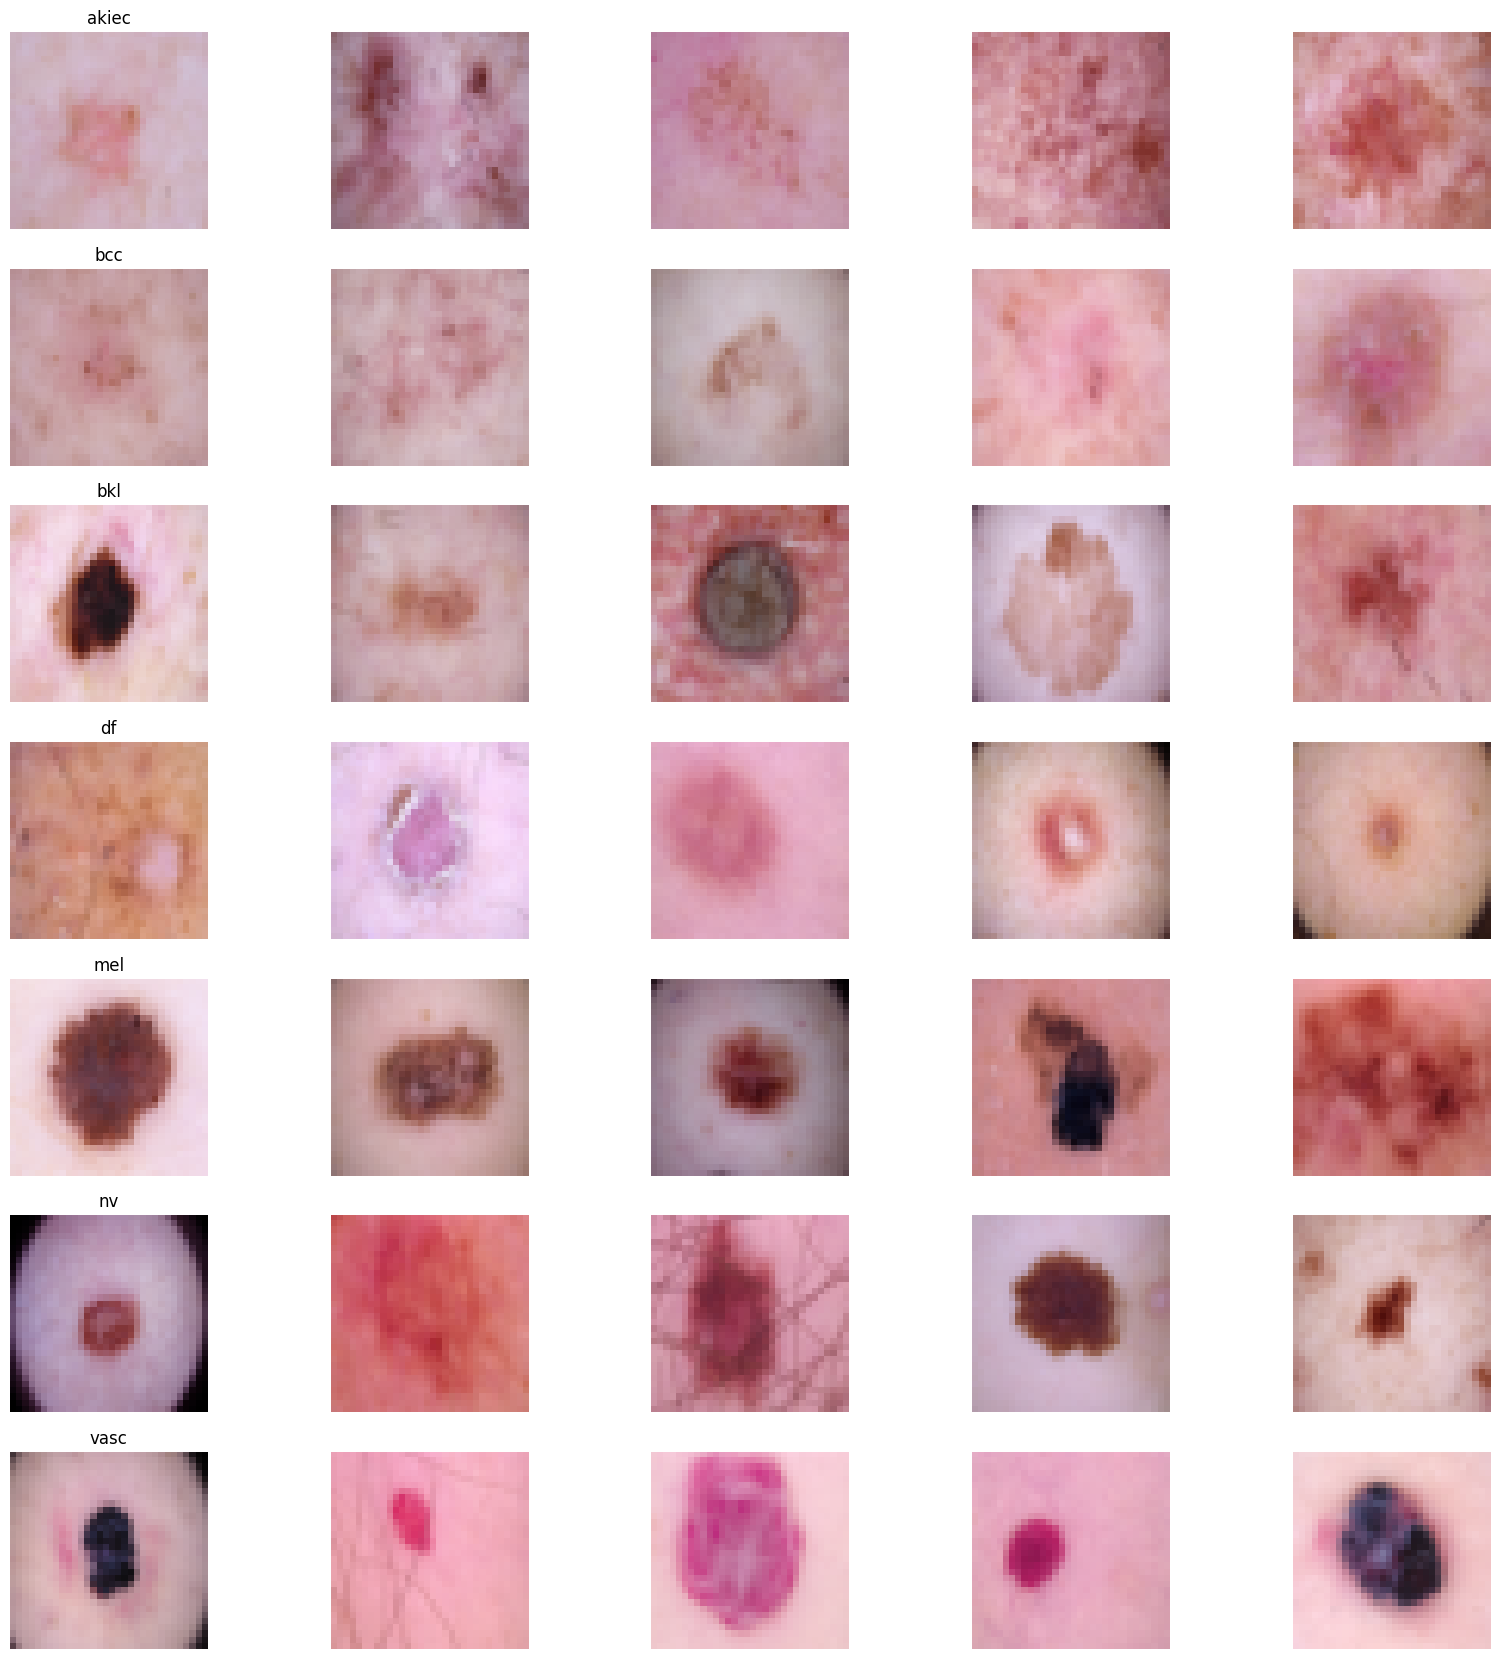

In [4]:
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [5]:
# Reorganize data into subfolders based on their labels
#then use keras flow_from_dir or pytorch ImageFolder to read images with 
#folder names as labels

#Sort images to subfolders first 
import pandas as pd
import os
import shutil


In [6]:
#Dump all images into a folder and specify the path:
data_dir =  "C:/Users/kunal_student/Desktop/Code/Github Projects/Skin Cancer Classification/data/all_images/"

# Path to destination directory where we want subfolders
dest_dir =  "C:/Users/kunal_student/Desktop/Code/Github Projects/Skin Cancer Classification/data/reorganized/"

# Read the csv file containing image names and corresponding labels
skin_df2 = pd.read_csv('C:/Users/kunal_student/Desktop/Code/Github Projects/Skin Cancer Classification/data/HAM10000/HAM10000_metadata.csv')
print(skin_df['dx'].value_counts())

label=skin_df2['dx'].unique().tolist()  #Extract labels into a list
label_images = []



dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [8]:
# Copy images to new folders
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df2[skin_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[]    


#Now we are ready to work with images in subfolders
    
### FOR Keras datagen ##################################
#flow_from_directory Method
#useful when the images are sorted and placed in there respective class/label folders
#identifies classes automatically from the folder name. 
# create a data generator
    

In [9]:
    
from keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt
import scipy
datagen = ImageDataGenerator()
import torchvision
from torchvision import transforms

Found 10015 images belonging to 7 classes.


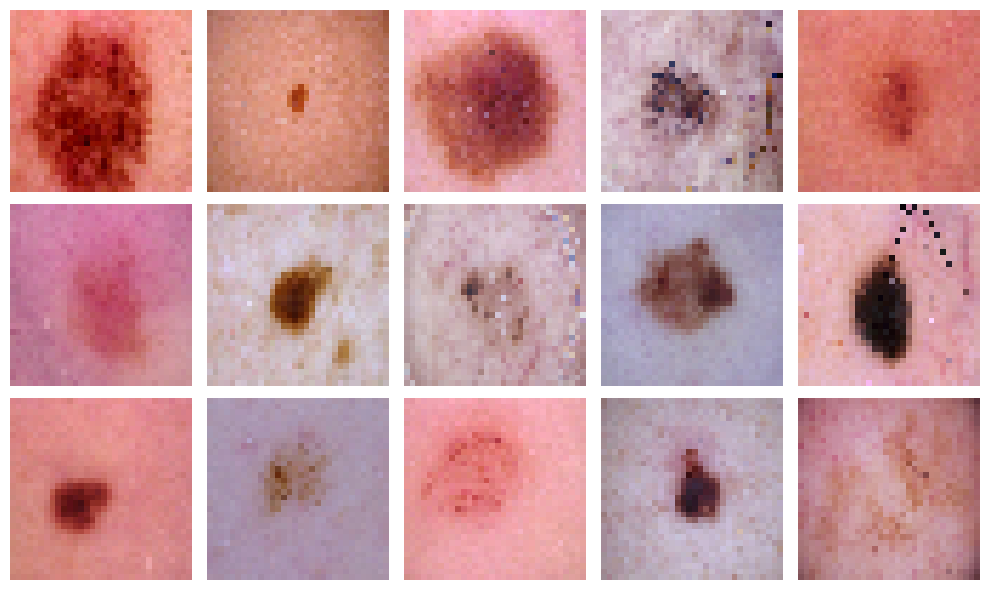

In [10]:

# define training directory that contains subfolders
train_dir = "C:/Users/kunal_student/Desktop/Code/Github Projects/Skin Cancer Classification/data/reorganized/"
#USe flow_from_directory
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,  #16 images at a time
                                         target_size=(32,32))  #Resize images

#We can check images for a single batch.
x, y = next(train_data_keras)


# View each image
num_images = 15
rows = 3
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
for i in range(num_images):
    row = i // cols
    col = i % cols
    
    image = x[i].astype(int)
    
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()




In [11]:
#Define root directory with subdirectories
train_dir = "C:/Users/kunal_student/Desktop/Code/Github Projects/Skin Cancer Classification/data/reorganized/"

#If you want to apply ransforms
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),       # Converts your input image to PyTorch tensor.
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5] )
    ])


In [12]:
#With transforms
#train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
#Without transforms
train_data_torch = torchvision.datasets.ImageFolder(root=train_dir)
#train_data_loader_torch = data.DataLoader(train_data_torch, batch_size=len(train_data_torch))
    
print("Number of train samples: ", len(train_data_torch))    
print("Detected Classes are: ", train_data_torch.class_to_idx) # classes are detected by folder structure    

labels = np.array(train_data_torch.targets)
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

Number of train samples:  10015
Detected Classes are:  {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
[[   0  327]
 [   1  514]
 [   2 1099]
 [   3  115]
 [   4 1113]
 [   5 6705]
 [   6  142]]
